In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table

In [51]:
df=pd.read_csv(r'C:\Users\Jiao Yuehan\Desktop\IT5006\Project_IT5006\pres\CMAPSSData\train_FD002.txt', delim_whitespace=True, header=None)
df

C:\Users\Jiao Yuehan\AppData\Local\Temp\ipykernel_14188\600594620.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv(r'C:\Users\Jiao Yuehan\Desktop\IT5006\Project_IT5006\pres\CMAPSSData\train_FD002.txt', delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [53]:
col_1=['unit','time','op1','op2','op3']
col_2=[]
for i in range(21):
    col=f'sr{i+1}'
    col_2.append(col)
columns=col_1+col_2
df.columns=columns
df['max_time']=df.groupby('unit')['time'].transform('max')
df['remaining_time']=df['max_time']-df['time']
df['label']=df['remaining_time'].clip(upper=130)
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,9.3461,0.02,334,2223,100.00,14.73,8.8071,149,148,130
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,9.3774,0.02,330,2212,100.00,10.41,6.2665,149,147,130
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,10.8941,0.02,309,1915,84.93,14.08,8.6723,149,146,130
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,9.3528,0.02,329,2212,100.00,10.59,6.4701,149,145,130
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,10.8963,0.02,309,1915,84.93,14.13,8.5286,149,144,130


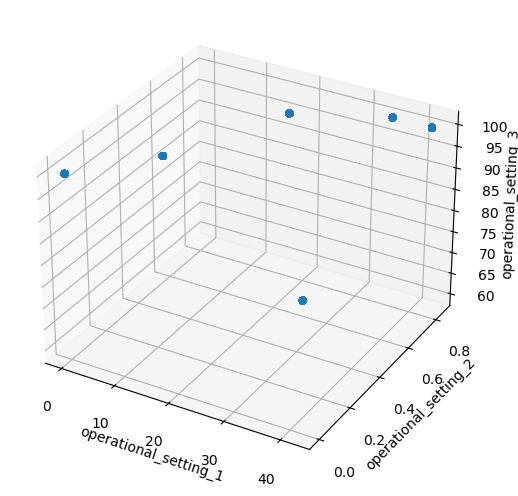

In [55]:
from mpl_toolkits.mplot3d import Axes3D
op1=df.iloc[:,2]
op2=df.iloc[:,3]
op3=df.iloc[:,4]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(op1, op2, op3)
ax.set_xlabel('operational_setting_1')
ax.set_ylabel('operational_setting_2')
ax.set_zlabel('operational_setting_3')
ax.tick_params(axis='x', pad=8)
ax.tick_params(axis='y', pad=8)
ax.tick_params(axis='z', pad=8)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'op3')

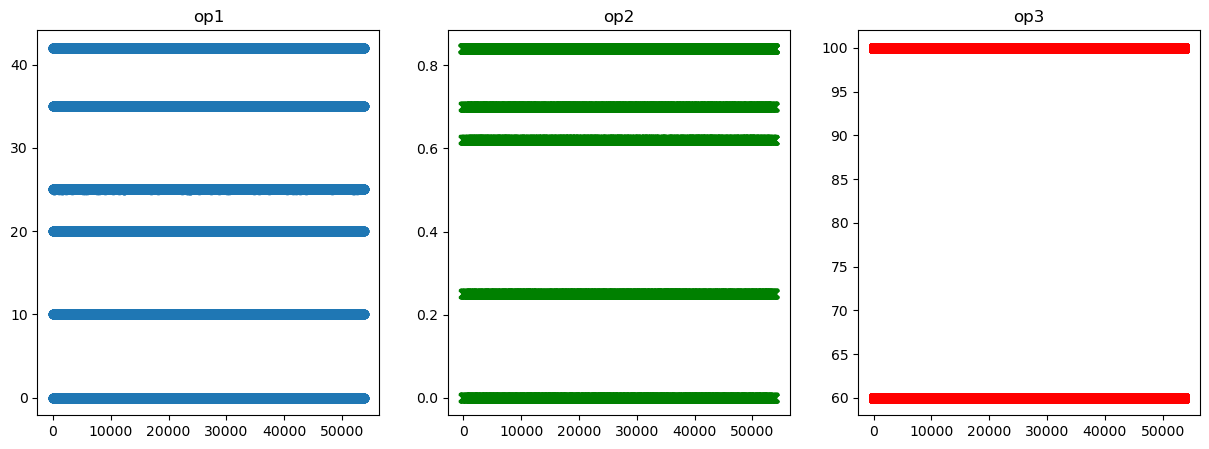

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(df.index, df['op1'], marker='o', label='op1')
axs[0].set_title('op1')
axs[1].scatter(df.index, df['op2'], marker='x', label='op2', color='g')
axs[1].set_title('op2')
axs[2].scatter(df.index, df['op3'], marker='s', label='op3', color='r')
axs[2].set_title('op3')

In [63]:
# type1: op1 in [0,1], op2 in [0,1], op3 in [99,100]
# type2: op1 in [9,11], op2 in [0.2,0.3], op3 in [99, 100]
# type3: op1 in [19,21], op2 in [0.65, 0.75], op3 in [99, 100]
# type4: op1 in [24, 26], op2 in [0.6, 0.63], op3 in [59, 61]
# type5: op1 in [30, 40], op2 >=0.8, op3 in [99, 100]
# type6: op1 >=40, op2>=0.8, op3 in [99, 100]
df_ops=df[['op1','op2','op3']]
conditions = [
    (df['op1'].between(0, 1)) & (df['op2'].between(0, 1)) & (df['op3'].between(99, 100)),  # type1
    (df['op1'].between(9, 11)) & (df['op2'].between(0.2, 0.3)) & (df['op3'].between(99, 100)),  # type2
    (df['op1'].between(19, 21)) & (df['op2'].between(0.65, 0.75)) & (df['op3'].between(99, 100)),  # type3
    (df['op1'].between(24, 26)) & (df['op2'].between(0.6, 0.63)) & (df['op3'].between(59, 61)),  # type4
    (df['op1'].between(30, 40)) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100)),  # type5
    (df['op1'] >= 40) & (df['op2'] >= 0.8) & (df['op3'].between(99, 100))  # type6
]
type_labels = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops['type'] = np.select(conditions, type_labels, default='undefined')
df_ops

C:\Users\Jiao Yuehan\AppData\Local\Temp\ipykernel_14188\294332328.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['type'] = np.select(conditions, type_labels, default='undefined')


,op1,op2,op3,type
0,34.9983,0.8400,100.0,type5
1,41.9982,0.8408,100.0,type6
2,24.9988,0.6218,60.0,type4
3,42.0077,0.8416,100.0,type6
4,25.0005,0.6203,60.0,type4
...,...,...,...,...
53754,20.0037,0.7000,100.0,type3
53755,10.0022,0.2510,100.0,type2
53756,25.0041,0.6200,60.0,type4
53757,25.0033,0.6220,60.0,type4


In [65]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore') 
X_ops=ohe.fit_transform(df_ops[['type']])
X_ops

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [67]:
column_names = ['type1', 'type2', 'type3', 'type4', 'type5', 'type6']
df_ops = pd.DataFrame(X_ops, columns=column_names)
df_ops

,type1,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
53754,0.0,0.0,1.0,0.0,0.0,0.0
53755,0.0,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
# Prevent multicollinearity
df_ops=df_ops.iloc[:,1:]
df_ops

,type2,type3,type4,type5,type6
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
53754,0.0,1.0,0.0,0.0,0.0
53755,1.0,0.0,0.0,0.0,0.0
53756,0.0,0.0,1.0,0.0,0.0
53757,0.0,0.0,1.0,0.0,0.0


In [71]:
df=pd.concat([df, df_ops], axis=1)
df

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr20,sr21,max_time,remaining_time,label,type2,type3,type4,type5,type6
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,14.73,8.8071,149,148,130,0.0,0.0,0.0,1.0,0.0
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,10.41,6.2665,149,147,130,0.0,0.0,0.0,0.0,1.0
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,14.08,8.6723,149,146,130,0.0,0.0,1.0,0.0,0.0
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,10.59,6.4701,149,145,130,0.0,0.0,0.0,0.0,1.0
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,14.13,8.5286,149,144,130,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,24.36,14.5189,316,4,4,0.0,1.0,0.0,0.0,0.0
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,28.10,16.9454,316,3,3,1.0,0.0,0.0,0.0,0.0
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,14.19,8.5503,316,2,2,0.0,0.0,1.0,0.0,0.0
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,14.05,8.3729,316,1,1,0.0,0.0,1.0,0.0,0.0


In [73]:
window_size = 30

rolled_df = roll_time_series(
    df,
    column_id='unit',
    column_sort='time',
    max_timeshift=window_size-1,
    min_timeshift=window_size-1,
    rolling_direction=1
)

rolled_df

Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 30/30 [00:10<00:00,  2.94it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr21,max_time,remaining_time,label,type2,type3,type4,type5,type6,id
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8.8071,149,148,130,0.0,0.0,0.0,1.0,0.0,"(1, 30)"
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,6.2665,149,147,130,0.0,0.0,0.0,0.0,1.0,"(1, 30)"
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,8.6723,149,146,130,0.0,0.0,1.0,0.0,0.0,"(1, 30)"
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,6.4701,149,145,130,0.0,0.0,0.0,0.0,1.0,"(1, 30)"
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,8.5286,149,144,130,0.0,0.0,1.0,0.0,0.0,"(1, 30)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379935,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,14.5189,316,4,4,0.0,1.0,0.0,0.0,0.0,"(260, 316)"
1379936,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,16.9454,316,3,3,1.0,0.0,0.0,0.0,0.0,"(260, 316)"
1379937,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,8.5503,316,2,2,0.0,0.0,1.0,0.0,0.0,"(260, 316)"
1379938,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,8.3729,316,1,1,0.0,0.0,1.0,0.0,0.0,"(260, 316)"


In [75]:
selected_cols=['id','type2','type3','type4','type5','type6','sr2', 'sr3', 'sr4',
                    'sr7', 'sr8', 'sr9', 'sr11',
                    'sr12', 'sr13', 'sr14', 'sr15',
                    'sr17', 'sr20', 'sr21']

In [77]:
selected_df=rolled_df[selected_cols]
selected_df

,id,type2,type3,type4,type5,type6,sr2,sr3,sr4,sr7,sr8,sr9,sr11,sr12,sr13,sr14,sr15,sr17,sr20,sr21
0,"(1, 30)",0.0,0.0,0.0,1.0,0.0,555.32,1358.61,1137.23,194.64,2222.65,8341.91,42.02,183.06,2387.72,8048.56,9.3461,334,14.73,8.8071
1,"(1, 30)",0.0,0.0,0.0,0.0,1.0,549.90,1353.22,1125.78,138.51,2211.57,8303.96,42.20,130.42,2387.66,8072.30,9.3774,330,10.41,6.2665
2,"(1, 30)",0.0,0.0,1.0,0.0,0.0,537.31,1256.76,1047.45,175.71,1915.11,8001.42,36.69,164.22,2028.03,7864.87,10.8941,309,14.08,8.6723
3,"(1, 30)",0.0,0.0,0.0,0.0,1.0,549.51,1354.03,1126.38,138.46,2211.58,8303.96,41.96,130.72,2387.61,8068.66,9.3528,329,10.59,6.4701
4,"(1, 30)",0.0,0.0,1.0,0.0,0.0,537.07,1257.71,1047.93,175.05,1915.10,7993.23,36.89,164.31,2028.00,7861.23,10.8963,309,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379935,"(260, 316)",0.0,1.0,0.0,0.0,0.0,608.79,1495.60,1269.51,334.00,2324.92,8852.27,44.72,314.05,2389.02,8169.64,9.3035,369,24.36,14.5189
1379936,"(260, 316)",1.0,0.0,0.0,0.0,0.0,605.81,1514.32,1324.12,392.46,2319.17,8915.86,46.08,371.22,2388.42,8245.36,8.7586,374,28.10,16.9454
1379937,"(260, 316)",0.0,0.0,1.0,0.0,0.0,537.48,1276.24,1057.92,175.11,1917.37,8114.33,37.14,163.74,2030.33,7971.25,11.0657,310,14.19,8.5503
1379938,"(260, 316)",0.0,0.0,1.0,0.0,0.0,537.84,1272.95,1066.30,174.81,1917.36,8112.63,37.32,164.37,2030.35,7972.47,11.0537,311,14.05,8.3729


In [ ]:
X=extract_features(
    selected_df,
    column_id='id',
    impute_function=impute
)
X

In [ ]:
y=rolled_df.groupby('id')['label'].last()

In [ ]:
X_filtered=select_features(X, y)